In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel("SE15Y_resultats.xlsx")
df.head()

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,Rg,Rn_measured,Rn_calcultated,Rn_used,T_soilref,Ta,RHa,uref,LAI_total,...,FNH3_soil,FNH3_cut,FNH3_stom,FNH3_canopy,FNH3_tot,NH3_canopy,NH3_leaf,NH3_soil,Drain_Runoff,Surface_Runoff
0,2013-01-01 00:00:00,6999,-20.878000,12887.13961,-20.878000,8.736833,7.316000,99.400000,1.786107,2.4,...,0.003395,-0.002124,0.0,-0.002123,0.001271,0.108232,0.063707,2.365732,5.911582,6656
1,2013-01-01 00:15:00,6999,-17.027333,10836.44924,-17.027333,8.724750,7.325333,99.413333,2.058361,2.4,...,0.003468,-0.002032,0.0,-0.002032,0.001437,0.104377,0.060958,2.410845,0.299747,6656
2,2013-01-01 00:30:00,6999,-16.450000,10836.21080,-16.450000,8.712667,7.320667,99.526667,2.142631,2.4,...,0.003479,-0.002001,0.0,-0.002001,0.001478,0.102905,0.060027,2.416238,0.499743,6656
3,2013-01-01 00:45:00,6999,-21.473333,10837.31474,-21.473333,8.712500,7.319333,99.600000,2.195486,2.4,...,0.003411,-0.001970,0.0,-0.001970,0.001441,0.100222,0.059112,2.368507,0.399843,6656
4,2013-01-01 01:00:00,6999,-21.625333,10837.46820,-21.625333,8.712333,7.330000,99.633333,2.108225,2.4,...,0.003405,-0.002001,0.0,-0.002001,0.001404,0.101776,0.060041,2.366414,0.299858,6656


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           35040 non-null  object 
 1   Rg                             35040 non-null  int64  
 2   Rn_measured                    35040 non-null  float64
 3   Rn_calcultated                 35040 non-null  float64
 4   Rn_used                        35040 non-null  float64
 5   T_soilref                      35040 non-null  float64
 6   Ta                             35040 non-null  float64
 7   RHa                            35040 non-null  float64
 8   uref                           35040 non-null  float64
 9   LAI_total                      35040 non-null  float64
 10  LAI_green                      35040 non-null  float64
 11  displacement_height            35040 non-null  float64
 12  z0_soil                        35040 non-null 

In [ ]:
df.date.dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df.Rain

0        0.1
1        0.3
2        0.5
3        0.4
4        0.3
        ... 
35035    0.0
35036    0.0
35037    0.0
35038    0.0
35039    0.0
Name: Rain, Length: 35040, dtype: float64

In [ ]:
df.columns

Index(['date', 'Rg', 'Rn_measured', 'Rn_calcultated', 'Rn_used', 'T_soilref',
       'Ta', 'RHa', 'uref', 'LAI_total', 'LAI_green', 'displacement_height',
       'z0_soil', 'z0_canopy', 'zh', 'zref', 'Rain', 'concentration_O3',
       'concentration_Pest', 'Pest_soil', 'concentration_NH3', 'GammaLeaf_NH3',
       'GammaSoil_NH3', 'R_litter_NH3', 'H', 'LE', 'G', 'Hv', 'Hs', 'LEv',
       'LEs', 'T_leaf', 'T_canopy', 'T_soil', 'u_star', 'u_star_ground',
       'RH_canopy', 'RH_leaf', 'RH_soil', 'Ra', 'Rac', 'Rb_leaf', 'Rb_soil',
       'r_soil_surface_H2O', 'r_thermal_drylayer', 'depth_drysoil',
       'WetLayer_Depth', 'teta_WetLayer', 'teta_minthreshold', 'teta_tot',
       'Qmulch', 'SWC_WetLayer', 'SWC_SoilTotal', 'SWP', 'Cumul_Rain_t3',
       'Cumul_evap_t3', 'gstom_tot_H2O', 'glight', 'gtemp', 'gVPD', 'gSWP',
       'gSWC', 'FO3_soil', 'FO3_cut', 'FO3_stom', 'FO3_stom_inactive',
       'FO3_canopy', 'FO3_tot', 'O3_canopy', 'O3_leaf', 'FPest_soil',
       'FPest_leaf_penetration_ad

In [ ]:
df['Rn_used'].count()

35040

In [ ]:
# Using matplotlib

plt.figure(figsize=(10, 6))
plt.plot(df.date.dt.dayofyear, df.Rn_used, color='blue', label='Rn')
plt.plot(df.date.dt.dayofyear, df.H, color='red', label='H')
plt.plot(df.date.dt.dayofyear, df.LE, color='black', label='LE')
plt.plot(df.date.dt.dayofyear, df.G, color='green', label='G')
plt.title('Energy Balance, SE15Y - 2013', fontsize=16)  # Add a title
plt.xlabel('Days', fontsize=14)
plt.ylabel('W/m2', fontsize=14)
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1000x600 with 0 Axes>

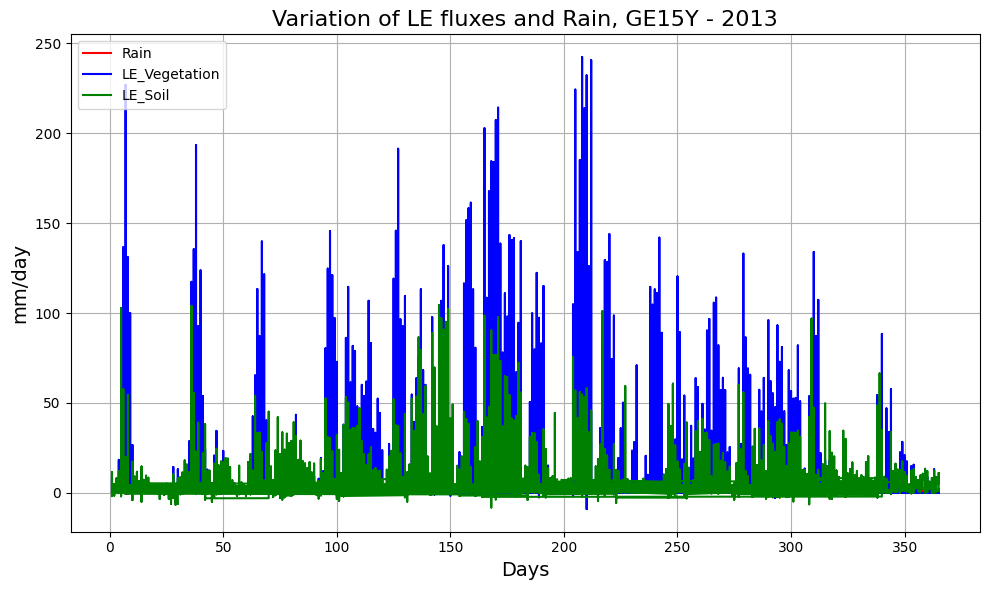

In [ ]:
# Using matplotlib

plt.figure(figsize=(10, 6))
# plt.plot(df.date.dt.dayofyear, df.Rain, color='#54ab6f', label='Rain')
plt.plot(df.date.dt.dayofyear, df.Rain, color='red', label='Rain')
plt.plot(df.date.dt.dayofyear, df.LEv, color='blue', label='LE_Vegetation')
plt.plot(df.date.dt.dayofyear, df.LEs, color='green', label='LE_Soil') 
#plt.plot(df.date.dt.dayofyear, df.G, color='green', label='G')
plt.title('Variation of LE fluxes and Rain, GE15Y - 2013', fontsize=16)  # Add a title
plt.xlabel('Days', fontsize=14)
plt.ylabel('mm/day', fontsize=14)
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()

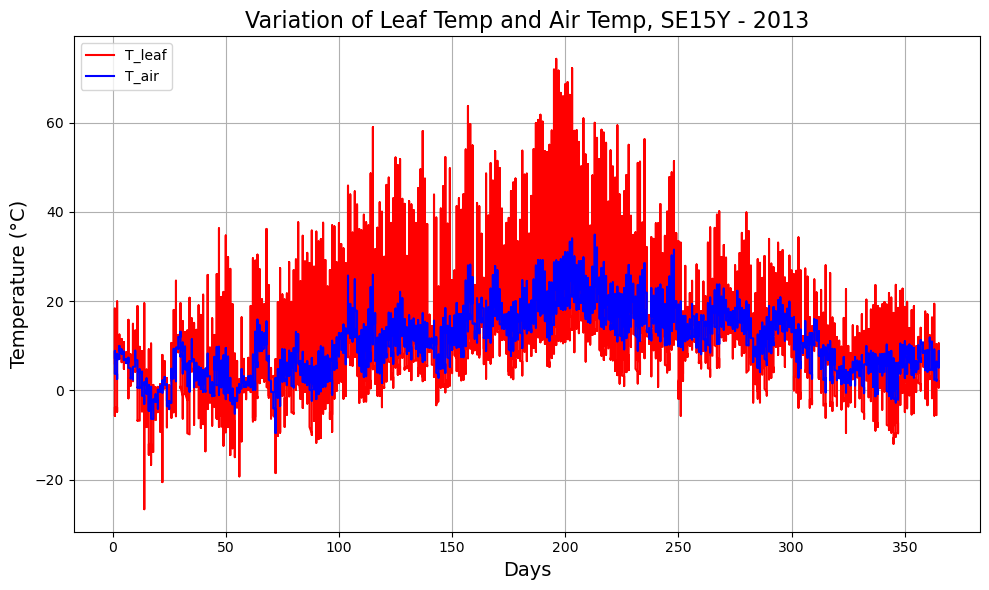

In [ ]:
# Using matplotlib

plt.figure(figsize=(10, 6))
# plt.plot(df.date.dt.dayofyear, df.Rain, color='#54ab6f', label='Rain')
plt.plot(df.date.dt.dayofyear, df.T_leaf, color='red', label='T_leaf')
plt.plot(df.date.dt.dayofyear, df.Ta, color='blue', label='T_air')
plt.title('Variation of Leaf Temp and Air Temp, SE15Y - 2013', fontsize=16)  # Add a title
plt.xlabel('Days', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True)  # Add gridlines (optional)
# plt.xticks(rotation=45)  # Rotate X-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.legend(loc='upper left')  # Display the legend
plt.show()